In [1]:
import os  

In [2]:
if os.getcwd()[-20:] =='3_analysis_notebooks':
    raise Exception('Incorrect Dir : Run Notebook in 4_hierarc/Analysis')

In [3]:
import hierarc
print (hierarc.__file__)
import h5py

/home/s1/chinyi/mybin/hierArc/hierarc/__init__.py


In [4]:
# some standard python imports #
import copy
import numpy as np
import corner
import emcee
import pickle
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from os.path import dirname, abspath
%matplotlib inline

# we give it a random seed to produce the identical plots
np.random.seed(seed=10)

from pylab import rc
rc('axes', linewidth=2)
rc('xtick',labelsize=15)
rc('ytick',labelsize=15)

# import the hierArc, lenstronomy and astropy classes
from hierarc.Sampling.mcmc_sampling import MCMCSampler
from astropy.cosmology import FlatLambdaCDM
from hierarc.Diagnostics.goodness_of_fit import GoodnessOfFit
from lenstronomy.Plots import plot_util
from hierarc.Util.distribution_util import PDFSampling

kwargs_corner = {'bins': 20, 'smooth': 0.7, 'smooth1d': None, 'plot_datapoints': False,
             'label_kwargs': dict(fontsize=20), 'levels': [0.68,0.95],
             'fill_contours': True, 'alpha': 0.2, 
            }


save_figures=True

color1 = '#1b9e77'
color2 = '#d95f02'
color3 = '#7570b3'


In [5]:
n_burn=1000

backend = emcee.backends.HDFBackend("all_lenses_chain_OM.h5")
mcmc_samples_sdss_all = backend.get_chain(discard=n_burn, flat=True, thin=1)
log_prob_sdss_all = backend.get_log_prob(discard=n_burn, flat=True, thin=1)
mcmc_samples_sdss_all_plot_OM = copy.deepcopy(mcmc_samples_sdss_all)

mcmc_samples_sdss_all_plot_OM = np.array([([x[0],x[2],x[3],x[1],x[4],x[5],x[6]]) for x in mcmc_samples_sdss_all_plot_OM])

In [6]:
backend = emcee.backends.HDFBackend("all_lenses_chain_const.h5")
mcmc_samples_sdss_all = backend.get_chain(discard=n_burn, flat=True, thin=1)
log_prob_sdss_all = backend.get_log_prob(discard=n_burn, flat=True, thin=1)
mcmc_samples_sdss_all_plot_const = copy.deepcopy(mcmc_samples_sdss_all)

mcmc_samples_sdss_all_plot_const = np.array([([x[0],x[2],x[3],x[1],x[4],x[5],x[6]]) for x in mcmc_samples_sdss_all_plot_const])





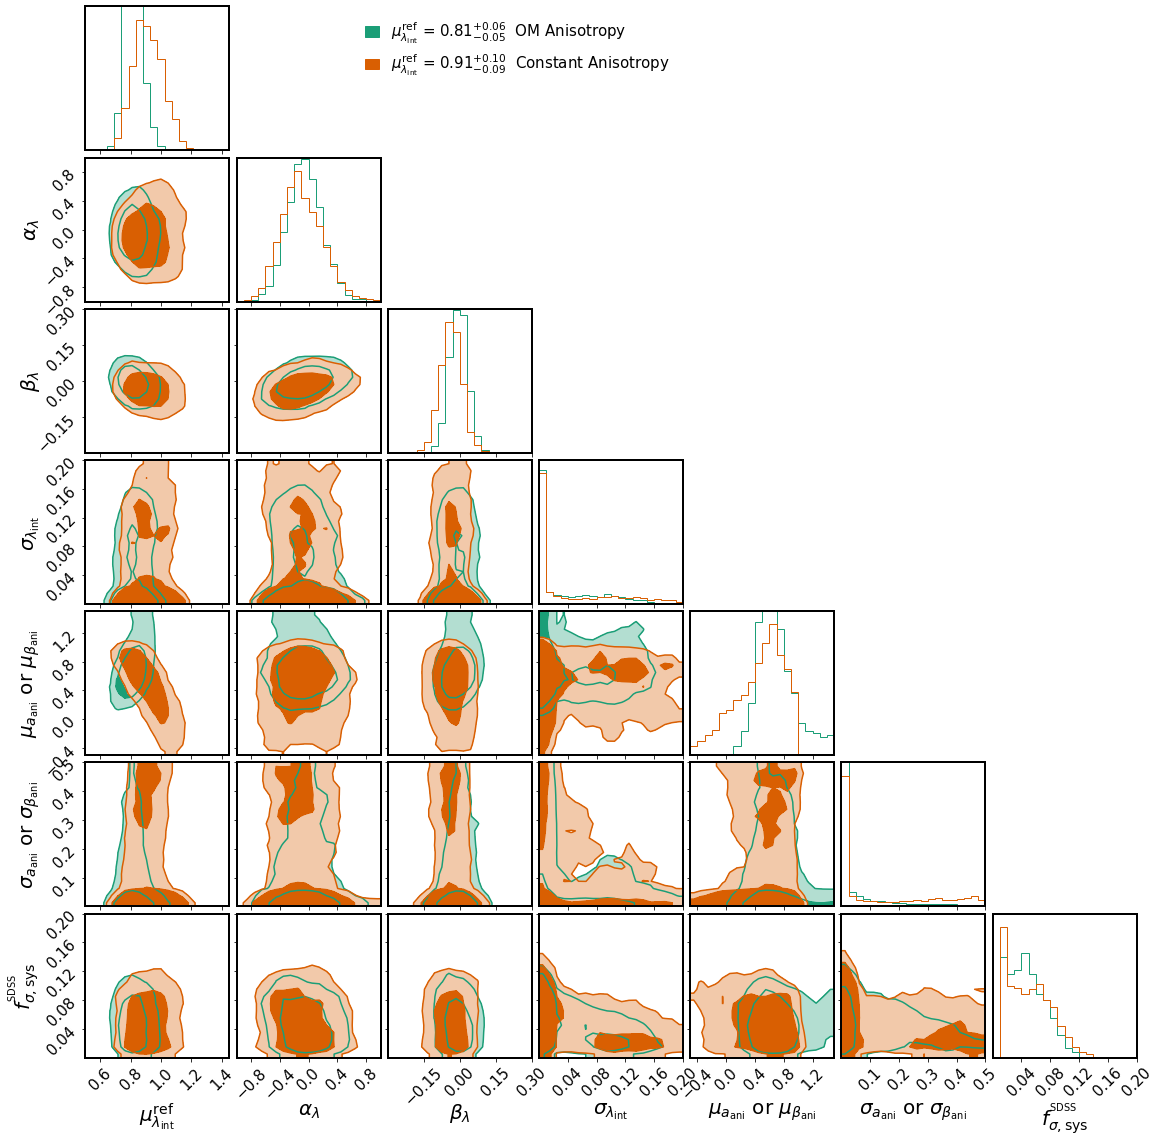

In [7]:

title_list = ['$\\mu_{\\lambda_{\\rm int}}^{\\rm ref}$',
 '$\\alpha_{\\lambda}$',
 '$\\beta_{\\lambda}$',
 '$\\sigma_{\\lambda_{\\rm int}}$',
 '$\\mu_{a_{\\rm ani}}$ or $\\mu_{\\beta_{\\rm ani}}$',
 '$\\sigma_{a_{\\rm ani}}$ or $\\sigma_{\\beta_{\\rm ani}}$',
 '$f^{^{\\rm SDSS}}_{\\sigma, {\\rm{sys}}}$']



fig = corner.corner(mcmc_samples_sdss_all_plot_OM, color=color1,
                    labels=title_list, title_fmt = '.2f',
                    show_titles=False,title_kwargs={"fontsize": 16},
                    range = [(0.5,1.45),(-1,1),(-0.3,0.3),(0,0.2),(-0.5,1.5),(0,0.5),(0,0.2)],
                    hist_kwargs= {'density': True, 'color': color1}, **kwargs_corner)

fig = corner.corner(mcmc_samples_sdss_all_plot_const, color=color2, fig=fig,
                    range = [(0.5,1.45),(-1,1),(-0.3,0.3),(0,0.2),(-0.5,1.5),(0,0.5),(0,0.2)],
                    hist_kwargs= {'density': True, 'color': color2}, **kwargs_corner)



ax = fig.axes[3]
ax.set_visible(True)
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


alpha= 1
result_string_sdss_quality = plot_util.result_string(mcmc_samples_sdss_all_plot_OM[:,0], weights=None, title_fmt=".2f", label='$\\mu_{\\lambda_{\\rm int}}^{\\rm ref}$')
result_string_sdss_all = plot_util.result_string(mcmc_samples_sdss_all_plot_const[:,0], weights=None, title_fmt=".2f", label='$\\mu_{\\lambda_{\\rm int}}^{\\rm ref}$')
patch_1 = mpatches.Patch(color=color1, label=result_string_sdss_quality+"  OM Anisotropy", alpha=alpha)
patch_2 = mpatches.Patch(color=color2, label=result_string_sdss_all+"  Constant Anisotropy", alpha=alpha)
ax.legend(handles=[patch_1, patch_2], fontsize=15, handlelength=0.9, loc=1, frameon=False)


if save_figures:
    plt.savefig('plots/hierarc_mcmc.pdf')


In [8]:
sigma_v_name_list, sigma_v_measurement_list, sigma_v_measurement_error_list, sigma_v_model_list, sigma_v_model_error_list = np.load('const_kin_fits.npy')

sigma_v_name_list_OM, sigma_v_measurement_list_OM, sigma_v_measurement_error_list_OM, sigma_v_model_list_OM, sigma_v_model_error_list_OM = np.load('OM_kin_fits.npy')

sigma_v_measurement_list = [float(x) for x in sigma_v_measurement_list]
sigma_v_measurement_error_list = [float(x) for x in sigma_v_measurement_error_list ]
sigma_v_model_list = [float(x) for x in sigma_v_model_list ]
sigma_v_model_error_list = [float(x) for x in sigma_v_model_error_list]
sigma_v_model_list_OM = [float(x) for x in sigma_v_model_list_OM ]
sigma_v_model_error_list_OM = [float(x) for x in sigma_v_model_error_list_OM]



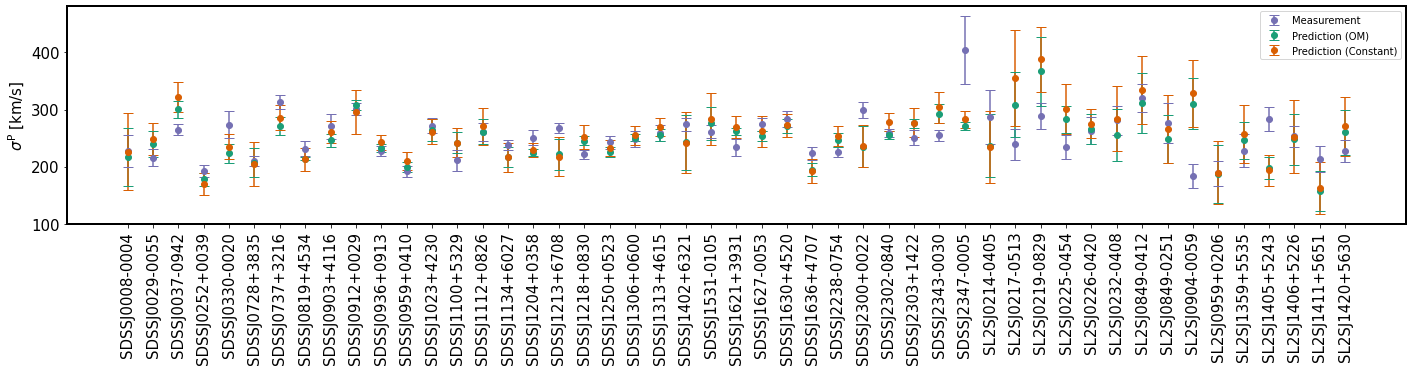

In [9]:
f, ax = plt.subplots(1, 1, figsize=(int(len(sigma_v_name_list)/2), 4))
ax.errorbar(np.arange(len(sigma_v_name_list)), sigma_v_measurement_list,
            yerr=sigma_v_measurement_error_list, xerr=None, fmt='o',
            ecolor=None, elinewidth=None, color=color3,
            capsize=5, barsabove=False, lolims=False, uplims=False,
            xlolims=False, xuplims=False, errorevery=1, capthick=None, data=None, label='Measurement')
ax.errorbar(np.arange(len(sigma_v_name_list)), sigma_v_model_list_OM, color=color1,
            yerr=sigma_v_model_error_list_OM, xerr=None, fmt='o',
            ecolor=None, elinewidth=None, label='Prediction (OM)', capsize=5)
ax.errorbar(np.arange(len(sigma_v_name_list)), sigma_v_model_list, color=color2,
            yerr=sigma_v_model_error_list, xerr=None, fmt='o',
            ecolor=None, elinewidth=None, label='Prediction (Constant)', capsize=5)

ax.set_xticks(ticks=np.arange(len(sigma_v_name_list)))
ax.set_xticklabels(labels=sigma_v_name_list, rotation='vertical')
ax.set_ylabel(r'$\sigma^{\rm P}$ [km/s]', fontsize=15)
ax.legend()

if save_figures:
    plt.savefig('plots/hierarc_fits.pdf', bbox_inches='tight')

NameError: name 'burn_in' is not defined

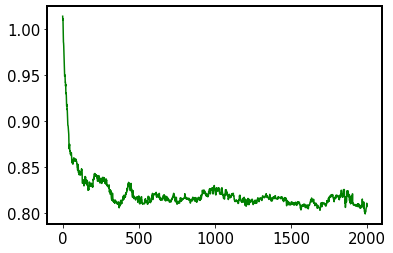

In [10]:
num_params = len(title_list)
num_step=len(h5py.File('all_lenses_chain_OM.h5', 'r')['mcmc']['chain'])

chain = h5py.File('all_lenses_chain_OM.h5', 'r')['mcmc']['chain']

parameter_list = np.arange(num_params)


mean_pos = np.zeros((num_params, num_step))
median_pos = np.zeros((num_params, num_step))
std_pos = np.zeros((num_params, num_step))
q16_pos = np.zeros((num_params, num_step))
q84_pos = np.zeros((num_params, num_step))

# chain = np.empty((nwalker, nstep, ndim), dtype = np.double)
for i in parameter_list:
    for j in np.arange(num_step):
        mean_pos[i][j] = np.mean(chain[j, :, i])
        median_pos[i][j] = np.median(chain[j, :, i])
        std_pos[i][j] = np.std(chain[j, :, i])
        q16_pos[i][j] = np.percentile(chain[j, :, i], 16.)
        q84_pos[i][j] = np.percentile(chain[j, :, i], 84.)


last = num_step
medians = []
verbose=False

for n, i in enumerate(parameter_list):
    if verbose:
        print(self.params_mcmc[i],
              '{:.4f} ± {:.4f}'.format(median_pos[i][last - 1],
                                       (q84_pos[i][last - 1] -
                                        q16_pos[i][last - 1]) / 2))

    plt.plot(median_pos[i][:last], c='g')
    plt.axhline(np.median(median_pos[i][burn_in:last]), c='r', lw=1)
    plt.fill_between(np.arange(last), q84_pos[i][:last],
                    q16_pos[i][:last], alpha=0.4)
    plt.ylabel(title_list[i], fontsize=8)
    plt.xlim(0, last)

    plt.show()

In [ ]:
num_params = len(title_list)
num_step=len(h5py.File('all_lenses_chain_const.h5', 'r')['mcmc']['chain'])

chain = h5py.File('all_lenses_chain_const.h5', 'r')['mcmc']['chain']

parameter_list = np.arange(num_params)


mean_pos = np.zeros((num_params, num_step))
median_pos = np.zeros((num_params, num_step))
std_pos = np.zeros((num_params, num_step))
q16_pos = np.zeros((num_params, num_step))
q84_pos = np.zeros((num_params, num_step))

# chain = np.empty((nwalker, nstep, ndim), dtype = np.double)
for i in parameter_list:
    for j in np.arange(num_step):
        mean_pos[i][j] = np.mean(chain[j, :, i])
        median_pos[i][j] = np.median(chain[j, :, i])
        std_pos[i][j] = np.std(chain[j, :, i])
        q16_pos[i][j] = np.percentile(chain[j, :, i], 16.)
        q84_pos[i][j] = np.percentile(chain[j, :, i], 84.)


last = num_step
medians = []
verbose=False

for n, i in enumerate(parameter_list):
    if verbose:
        print(self.params_mcmc[i],
              '{:.4f} ± {:.4f}'.format(median_pos[i][last - 1],
                                       (q84_pos[i][last - 1] -
                                        q16_pos[i][last - 1]) / 2))

    plt.plot(median_pos[i][:last], c='g')
    plt.axhline(np.median(median_pos[i][burn_in:last]), c='r', lw=1)
    plt.fill_between(np.arange(last), q84_pos[i][:last],
                    q16_pos[i][:last], alpha=0.4)
    plt.ylabel(title_list[i], fontsize=8)
    plt.xlim(0, last)

    plt.show()